Notebook to create my diagram of the timeline of passive microwave satellites for polar sea ice monitoring (see Fig. 1 in Lavergne et al., 2019).

Lavergne, T., Sørensen, A. M., Kern, S., Tonboe, R., Notz, D., Aaboe, S., Bell, L., Dybkjær, G., Eastwood, S., Gabarro, C., Heygster, G., Killie, M. A., Brandt Kreiner, M., Lavelle, J., Saldo, R., Sandven, S., and Pedersen, L. T.: Version 2 of the EUMETSAT OSI SAF and ESA CCI sea-ice concentration climate data records, The Cryosphere, 13, 49–78, https://doi.org/10.5194/tc-13-49-2019, 2019.

In [1]:
from datetime import datetime, timedelta
import time
import matplotlib
from matplotlib import pylab as plt
from PIL import Image

import numpy as np

import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import Ellipse
from matplotlib.colors import to_rgb, rgb_to_hsv
from matplotlib.legend_handler import HandlerPatch


matplotlib.rc('xtick', labelsize=22) 

In [2]:
def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = datetime(year=year, month=1, day=1)
    startOfNextYear = datetime(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

# Bbox object around which the fancy box will be drawn.
def draw_bbox(ax, bb, label=None,ready=True):
    # boxstyle=square with pad=0, i.e. bbox itself.
    bb = mtransforms.Bbox([[bb[0], bb[2]], [bb[1], bb[3]]])
    
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="square,pad=0.",
                            ec="k", fc="none", zorder=10.,)
    
    if ready:
        ec=(0.3,0.3,0.3)
        fc=(0.8,0.8,0.8)
        lw=2
        ls='-'
    else:
        ec=(0.3,0.3,0.3)
        fc=(0.9,0.9,0.9)
        lw=1
        ls=':'
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             ec=ec, fc=fc, lw=lw,ls=ls,)

    if label:
        ax.text(bb.xmin+0.2,bb.ymin,label,fontsize=15,ha='left',va='bottom',style='italic')
    
    ax.add_patch(p_fancy)
    #ax.add_patch(p_bbox)
    
def rgb_to_hsl(r, g, b):
    r = float(r)
    g = float(g)
    b = float(b)
    high = max(r, g, b)
    low = min(r, g, b)
    h, s, l = ((high + low) / 2,)*3

    if high == low:
        h = 0.0
        s = 0.0
    else:
        d = high - low
        s = d / (2 - high - low) if l > 0.5 else d / (high + low)
        h = {
            r: (g - b) / d + (6 if g < b else 0),
            g: (b - r) / d + 2,
            b: (r - g) / d + 4,
        }[high]
        h /= 6

    return h, s, l

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

./pmr_satellites.png is ready


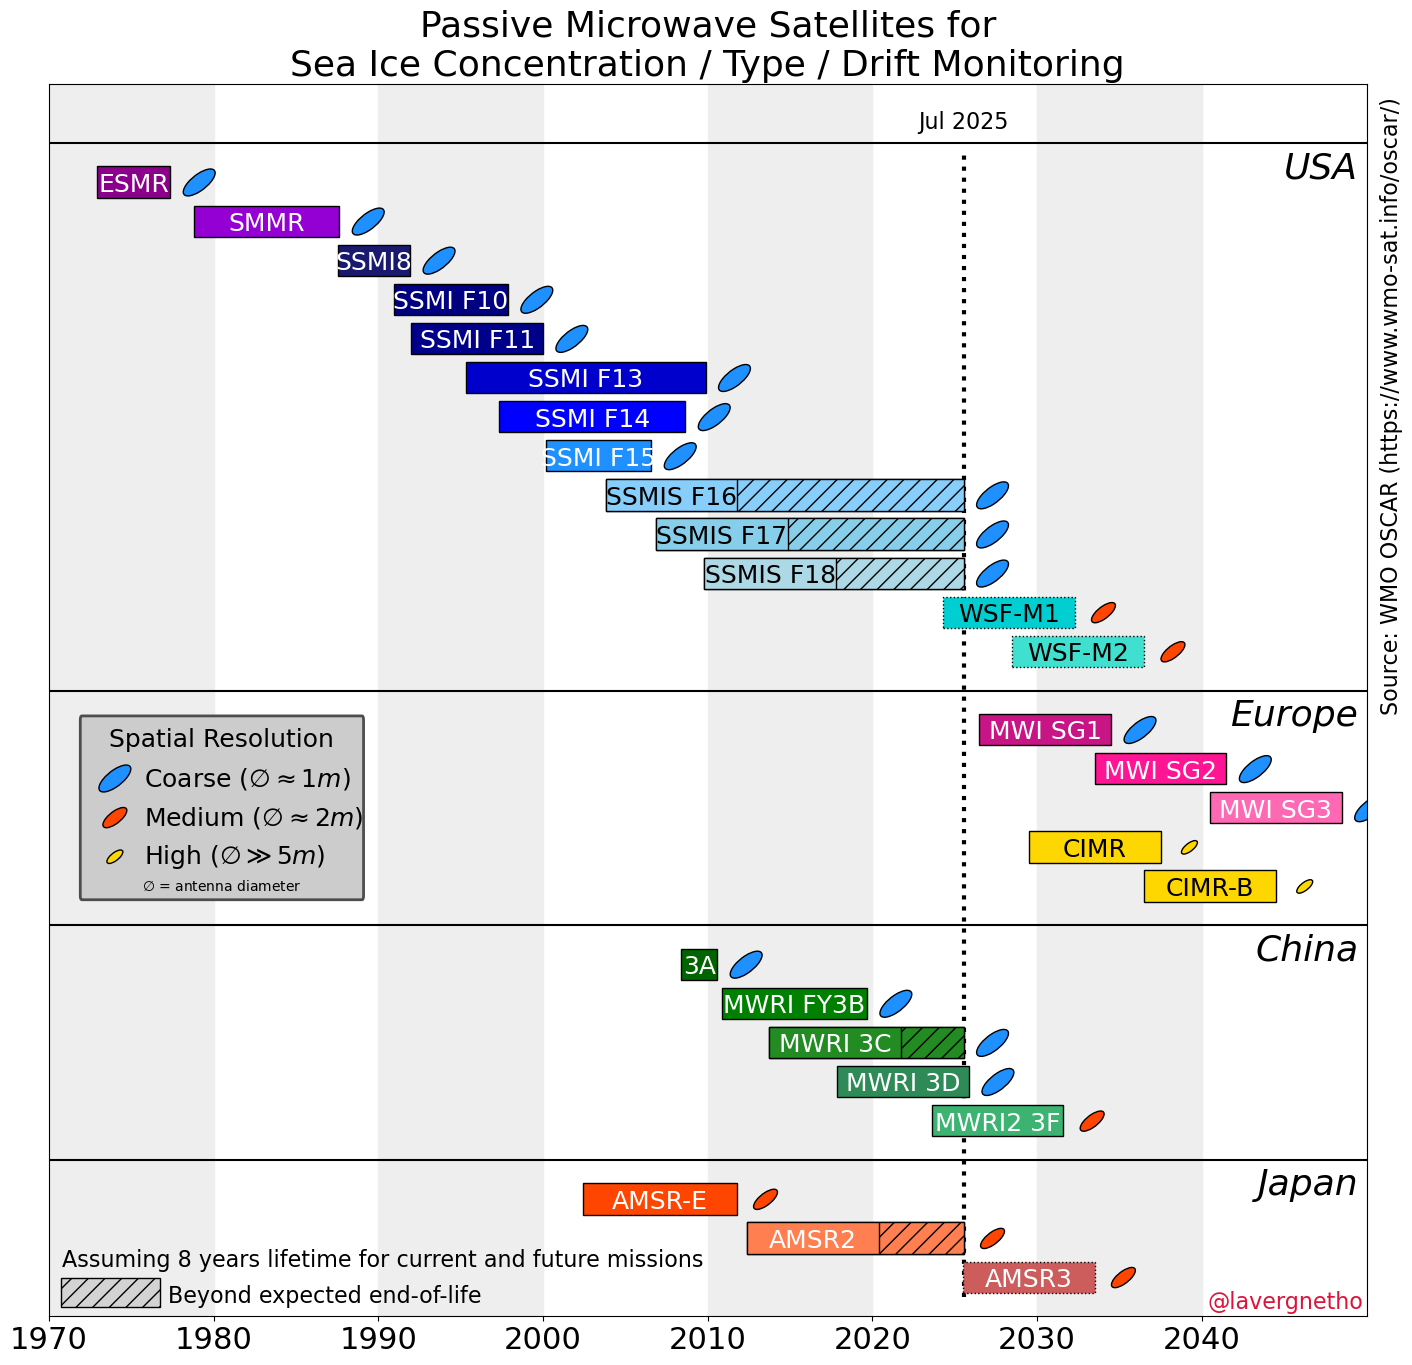

In [3]:
SIC_sats = []
#SIC_sats += ['Meteor N3',] + ['MetN%1d' % (d,) for d in range (2,0,-1)]
#SIC_sats += ['yspace-Russia']
SIC_sats += ['AMSR3','AMSR2','AMSR-E']
SIC_sats += ['yspace-Japan']
#SIC_sats += ['WCOM (?)',]
SIC_sats += ['MWRI2 FY3%s' % (c.upper(),) for c in ('f')]
SIC_sats += ['MWRI FY3%s' % (c.upper(),) for c in ('d','c','b','a')]
SIC_sats += ['yspace-China']
SIC_sats += ['CIMR-B','CIMR']
SIC_sats += ['MWI SG%1d' % (d,) for d in range(3,0,-1)]
SIC_sats += ['yspace-Europe']
SIC_sats += ['WSF-M%0d' % (d,) for d in (2,1)]
SIC_sats += ['SSMIS F%02d' % (d,) for d in range(18,15,-1)]
SIC_sats += ['SSMI F%d' % (d,) for d in (15,14,13,11,10)] + ['SSMI8']
SIC_sats += ['SMMR',]
SIC_sats += ['ESMR',]
SIC_sats += ['yspace-USA']


sflying = datetime.today() + timedelta(days=25.*365.25)
mlength = 8

dates = dict()
dates['ERA-Interim'] = (datetime(1979,1,1), sflying)
dates['AMSR-E']      = (datetime(2002,6,1), datetime(2011,10,4))
dates['AMSR2']   = (datetime(2012,5,17),sflying)
dates['AMSR3']   = (datetime(2025,6,28),sflying)
dates['WSF-M1']   = (datetime(2024,4,11),sflying)
dates['WSF-M2']   = (datetime(2028,7,1),sflying)
dates['SSMIS F20']   = (datetime(2020,1,1),sflying)
dates['SSMIS F19']   = (datetime(2014,4,3),datetime(2016,2,11))
dates['SSMIS F18']   = (datetime(2009,10,18),sflying)
dates['SSMIS F17']   = (datetime(2006,11,4),sflying)
dates['SSMIS F16']   = (datetime(2003,10,18),sflying)
dates['SSMI F15']   = (datetime(2000,2,28),datetime(2006,7,31))
dates['SSMI F14']   = (datetime(1997,5,7),datetime(2008,8,23))
dates['SSMI F13']   = (datetime(1995,5,3),datetime(2009,11,15))
dates['SSMI F11']   = (datetime(1992,1,1),datetime(1999,12,31))
dates['SSMI F10']   = (datetime(1990,12,15),datetime(1997,11,15))
dates['SSMI8']     = (datetime(1987,7,9),datetime(1991,12,8))
dates['SMMR']        = (datetime(1978,10,25),datetime(1987,8,20))
dates['ESMR']      = (datetime(1972,12,11), datetime(1977,5,16))
dates['MWI SG1']     = (datetime(2026,7,1),sflying)
dates['MWI SG2']     = (datetime(2033,7,1),sflying)
dates['MWI SG3']     = (datetime(2040,7,1),sflying)
dates['MWRI2 FY3F']   = (datetime(2023,8,4),sflying) 
dates['MWRI FY3D']   = (datetime(2017,11,14),sflying)
dates['MWRI FY3C']   = (datetime(2013,9,23),sflying)
dates['MWRI FY3B']   = (datetime(2010,11,4),datetime(2019,9,3))
dates['MWRI FY3A']   = (datetime(2008,5,27),datetime(2010,8,1))
dates['MetN1']   = (datetime(2009,9,17),datetime(2014,11,23))
dates['MetN2']   = (datetime(2014,7,8),datetime(2017,8,15))
dates['Meteor N3']   = (datetime(2017,12,10),datetime(2017,12,11))
dates['WCOM (?)']    = (datetime(2024,1,1), sflying)
dates['CIMR']    = (datetime(2029,7,1), sflying)
dates['CIMR-B']    = (dates['CIMR'][0] + timedelta(days=365.25*7), sflying)

colors=dict()
colors['ERA-Interim'] = 'Yellow'
colors['ESMR'] = 'DarkMagenta'
colors['SMMR'] = 'DarkViolet'
colors['SSMI8'] = 'MidnightBlue'
colors['SSMI F10'] = 'Navy'
colors['SSMI F11'] = 'DarkBlue'
colors['SSMI F13'] = 'MediumBlue'
colors['SSMI F14'] = 'Blue'
colors['SSMI F15'] = 'DodgerBlue'
colors['SSMIS F16'] = 'LightSkyBlue'
colors['SSMIS F17'] = 'SkyBlue'
colors['SSMIS F18'] = 'LightBlue'
colors['SSMIS F19'] = 'LightSteelBlue'
colors['SSMIS F20'] = 'White'
colors['WSF-M1']  = 'DarkTurquoise'
colors['WSF-M2']  = 'Turquoise'
colors['AMSR-E']     = 'OrangeRed'
colors['AMSR2']  = 'Coral'
colors['AMSR3']  = 'IndianRed'
colors['MWI SG1'] = 'MediumVioletRed'
colors['MWI SG2'] = 'DeepPink'
colors['MWI SG3'] = 'HotPink'
colors['CIMR']      = 'Gold'
colors['CIMR-B']      = 'Gold'
colors['MWRI FY3A'] = 'DarkGreen'
colors['MWRI FY3B'] = 'Green'
colors['MWRI FY3C'] = 'ForestGreen'
colors['MWRI FY3D'] = 'SeaGreen'
colors['MWRI2 FY3F'] = 'MediumSeaGreen'


colors['WCOM (?)']   = 'White'
colors['MetN1'] = 'OliveDrab'
colors['MetN2'] = 'OliveDrab'
colors['Meteor N3'] = 'White'

pmrt=dict()
for pmr in colors.keys():
    if pmr in ('AMSR-E', 'AMSR2', 'AMSR3', 'WSF-M1', 'WSF-M2', 'MWRI2 FY3F'):
        pmrt[pmr] = 'medium'
    elif pmr in ('CIMR', 'CIMR-B'):
        pmrt[pmr] = 'high'
    else:
        pmrt[pmr] = 'coarse'

type_colors = dict()
type_colors['medium']   = 'OrangeRed'
type_colors['coarse']   = 'DodgerBlue'
type_colors['high']     = 'Gold'

  
def do_plot(Fdate=datetime(1985,1,1),Edate=datetime(2015,12,31),
            Rdate=datetime(2016,10,16),ctype=False):

    sats = SIC_sats

    fig = plt.figure(figsize=(17.,16))
    ax = plt.gca()
    
    ax.xaxis.set_ticks_position('bottom')

    hgh = 0.80 

    today = toYearFraction(datetime.today())
    fdate = toYearFraction(Fdate)
    edate = toYearFraction(Edate)

    #add shading per decade
    for dec in range(1970,2100,20):
        ax.axvspan(toYearFraction(datetime(dec,1,1)), toYearFraction(datetime(dec+9,12,31)),
                   color='#eeeeee')
    
    # configuration for the ellipses used for spatial resolution
    ews = {'coarse':2., 'medium':1.5, 'high':1.}
    eh  = hgh / 1.7
    ea = 15
    
    yi = -1
    
    # counting the number of available satellites at anytime
    times = np.linspace(fdate,edate,num=int((edate-fdate)*12*2))
    nbsats = dict()
    for types in ('coarse', 'medium', 'high'):
        nbsats[types] = np.zeros_like(times)
    
    yleg = 0
    for i,s in enumerate(sats):
       
        if 'yspace' in s:
            ax.plot([fdate,edate],[1.5+yi,1.5+yi],'k-')
            country = s.split('-')[-1]
            yi += 1
            ax.text(edate-0.5,yi+0.30,country,fontsize=26,ha='right',va='top',style='italic')
            if country == 'China' or  country == 'Europe':
                yleg += yi
            continue
        yi += 1
        max_date = min(dates[s][1],Edate)

        yf_start = toYearFraction(dates[s][0])
        yf_stop  = toYearFraction(dates[s][1])
            
        
        lmlength = mlength
        if 'CIMR' in s :
            lmlength = 8
        
        if yf_start < today and yf_stop > today: 
            if (today-yf_start) > lmlength:
                flying = 0
            else:
                flying = +1
        elif yf_start < today and yf_stop < today:
            flying = -1
        elif yf_start > today and yf_stop > today:
            flying = +1
            
        if flying == 0 or flying == 1:
            yf_stop = toYearFraction(dates[s][0]+timedelta(days=365.25*lmlength))
        
        eob = today
        
        colfill = colors[s]
        if ctype:
            colfill = type_colors[pmrt[s]]
            if colors[s] == 'White':
                continue
        
        coltext = 'white'
        coledge = 'black'
        edgestyle= '-'
        if 'SSMIS' in s or 'CIMR' in s:
            coltext = 'black'
        if s.startswith('WSF-M'):
            coltext = 'black'
            edgestyle = ':'
        if 'AMSR3' in s:
            coltext = 'white'
            edgestyle = ':'
            
        if s.startswith('ERA') or s == 'SSMIS F20' or s == 'Meteor N3' or s == 'WCOM (?)':
            coledge = 'black'
            edgestyle = ':'
            
        tag = s
        if s == 'SSMIS F19':
            tag = '19'
        elif s == 'MWRI FY3A':
            tag = '3A'
        elif s.startswith('MWRI') and 'FY3B' not in s:
            # shortens the tag of MWRI instruments
            t1,t2 = s.split()
            tag = ' '.join([t1,t2.replace('FY','')])

        ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,yf_stop-yf_start,height=hgh,left=yf_start,color=colfill,
                edgecolor=coledge,ls=edgestyle)
        y_mid = (yf_start+yf_stop)*0.5
        if flying == 0:
            ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,today-yf_start,height=hgh,left=yf_start,color=colfill,edgecolor=coledge)
            ax.barh(1+yi-hgh*0.5-(1-hgh)*0.5,eob-yf_stop,height=hgh,left=yf_stop,color=colfill,hatch='//',edgecolor='black') 
        
        h_mid = 1+yi-hgh*0.6-(1-hgh)*0.4
        ax.text(y_mid,h_mid,tag,va='center',ha='center',color=coltext,fontsize=18)
        
        # add FoV ellipse
        ew = ews[pmrt[s]]
        
        xe = toYearFraction(dates[s][1])
        if flying == 0:
            xe = eob
        elif flying == 1:
            xe = toYearFraction(dates[s][0] + timedelta(days=365.25*lmlength))
        
        #print(s, flying, xe)
        ell = Ellipse(xy=(xe+1.75,h_mid+.05),width=ew,
                      height=eh*(ew/ews['coarse']),angle=ea)
        ax.add_artist(ell)
        ell.set_facecolor(type_colors[pmrt[s]])
        ell.set_edgecolor('black')
        
        # count number of satellites available at all time
        nbsats[pmrt[s]][(times>=yf_start)*(times<=yf_stop)] += 1
        if flying == 0:
            pass
          
    
    # finalize the plot
    
    # add legend per instr type / resolution
    xe = 1974.
    ye_step = 1.
    ye = yleg * 0.5 + ye_step + 0.25
    
    leg_labels = [r'Coarse ($\emptyset \approx 1m$)', r'Medium ($\emptyset \approx 2m$)', r'High ($\emptyset \gg 5m$)']
    legend_box = [xe - 2, xe + 15 , ye + 1.5, ye - 2 * ye_step - 1]
    draw_bbox(ax, legend_box,)
    ax.text(0.5*(legend_box[0]+legend_box[1]),ye+1,'Spatial Resolution',va='center',ha='center',fontsize=18)
    for iresol,resol in enumerate(('coarse','medium','high')):
        ell = Ellipse(xy=(xe,ye),width=ews[resol],height=eh*(ews[resol]/ews['coarse']),angle=ea)
        ax.add_artist(ell)
        ell.set_facecolor(type_colors[resol])
        ell.set_edgecolor('black')
        ax.text(xe+1.75,ye,leg_labels[iresol], fontsize=18, va='center')
        ye -= ye_step
    ax.text(0.5*(legend_box[0]+legend_box[1]),ye+0.25,r'$\emptyset$ = antenna diameter',
            va='center',ha='center',fontsize=10)
    
    # add text and labels
    ax.plot([today,today],[0.,yi+0.25],ls=':',c='black',zorder=0,lw=3)
    ax.text(today,yi+.75,'{:%b %Y}'.format(datetime.today()),ha='center',va='bottom',fontsize=16)
    ax.set_xlim(fdate,edate)
    ax.set_ylim(-0.5,yi+2)
    
    ax.text(1.01,0.99,'Source: WMO OSCAR (https://www.wmo-sat.info/oscar/)',
            rotation='vertical',transform=ax.transAxes,va='top',fontsize=16)
    ax.text(0.01,0.04,'Assuming {} years lifetime for current and future missions'.format(mlength),
            transform=ax.transAxes,ha='left',fontsize=16)
    ax.barh(0.1,6,height=0.75,left=fdate+0.75,color='lightgrey',hatch='//',edgecolor='black')
    ax.text(fdate+0.75+6+0.5,0.1-0.75*0.5,'Beyond expected end-of-life',fontsize=16,va='bottom')
    
    ax.text(0.998,0.002,'@lavergnetho',transform=ax.transAxes,ha='right',va='bottom',fontsize=16,color='Crimson')

    
    ax.set_yticks(())
    ax.set_title('Passive Microwave Satellites for\nSea Ice Concentration / Type / Drift Monitoring',fontsize=26)
    
    
    return fig 

if __name__ == '__main__':


    Edate=datetime(2049,12,31)
    Fdate=datetime(1970,1,1)

    f1 = do_plot(Fdate=Fdate,Edate=Edate,ctype=False)

    oname = './pmr_satellites.png'
    plt.savefig(oname,bbox_inches='tight',dpi=300)
    print( "{} is ready".format(oname,) )
    
    plt.show()